In [1]:
### Beta Cephei Radial Velocity Curve Fit

In [2]:
import os
from astropy import *
import numpy as np
import math as math
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from scipy.optimize import curve_fit

residual 0.676 km/s
Period = 0.190875 days
Amplitude = 20.13 km/s
Phase = 9.8753 days
Zero Point = -2.34 km/s


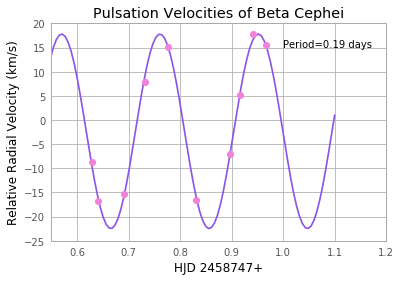

In [36]:
pi=3.14159265358979323846264
ydata=np.array([-8.599, -16.692, -15.324, 7.956, 15.147, -16.494, -7.116, 5.221, 17.752, 15.557])
xdata=np.array([.62804391,.64063674,.69024426,.7314142,.77727157,.83156678,.89614028,.91724037,.94177811,.96610756])
def orbit(x,p1,p2,p3,p4): return p1*np.sin((x-p2)/p3)+p4
popt, pcov = curve_fit(orbit, xdata, ydata, p0=(18.0,10.0,0.031,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata - orbit(xdata,p1,p2,p3,p4)
n=10
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.65-1, 1.1, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
plt.plot(xx,c, color="#8E56E6")
plt.plot(xdata,ydata,'ro', color="#F281DA")
plt.xlabel('HJD 2458747+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei')
per=np.multiply(2*pi,p3)
print("residual", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
#print(p3)
print("Zero Point =", '%.2f' % p4, "km/s")
plt.text(1.0, 15, r'Period=0.19 days')
plt.axis([0.55, 1.2, -25, 20])
plt.grid(True)
plt.show()